<a href="https://colab.research.google.com/github/abeld19/Predicting-Oral-Temperatures-and-Detecting-Fever/blob/main/Predicting_oral_temperatures_and_detecting_fever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Oral Temperatures and Detecting Fever

# Introduction

In this project analyses the Infrared Thermography Temperature Dataset to predict oral temperatures measured in fast and monitor modes (regression task) and to detect fever (classification task). Fever is defined as an oral temperature ≥37.5°C. The dataset contains 33 features, including demographic, environmental, and thermal image readings.

The approach involves exploratory data analysis, data preprocessing (handling missing values with mean imputation and encoding categorical variables), model training using multi-output regression and classification, threshold tuning for optimal classification performance, and cross-validation to ensure generalisability.

# Key Goals

Predict aveOralF and aveOralM accurately.

Detect fever (binary targets: fever_fast and fever_monitor).

Compare different models (e.g., linear vs. polynomial, regularized models like Ridge, Lasso, ElasticNet).

Evaluate model performance with appropriate metrics and visualisations.

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns

# Loadig the dataset

In [ ]:
# Fetch the dataset with ID 925 (Infrared Thermography Temperature Dataset)
infrared_thermography_temperature = fetch_ucirepo(id=925)

# Extract features and targets as pandas DataFrames
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# Display metadata and variable information
print("Metadata")
print(infrared_thermography_temperature.metadata)
print("\nVariable Information")
print(infrared_thermography_temperature.variables)


Metadata
{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col

# Preview the data

In [ ]:
# Preview the first few rows of the features and targets DataFrames
print("Features")
display(X.head())
print("Targets")
display(y.head())


Features


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


Targets


,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


# Check data types and summary statistics

In [ ]:
# Check the data types of each column in the features DataFrame
print("Data Types in Features")
print(X.dtypes)

# Display summary statistics for the features
print("Summary Statistics")
display(X.describe())


Data Types in Features
Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
dtype: object
Summary Statistics


,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


This section inspects the data types and summary statistics for the dataset's features. The output reveals that categorical variables like Gender, Age, and Ethnicity are stored as objects, while all other features, such as T_atm, Humidity, Distance, and various temperature measurements, are represented as float64. The summary statistics generated by X.describe() provide essential insights into the data’s distribution. for example, T_atm has a mean of approximately 24.12, a standard deviation of about 1.34, with values ranging from a minimum of 20.20 to a maximum of 29.10. These metrics help us understand the central tendency, variability, and range of our numerical features, which is crucial for guiding subsequent preprocessing steps like imputation and scaling.

# Plot histograms for numerical features

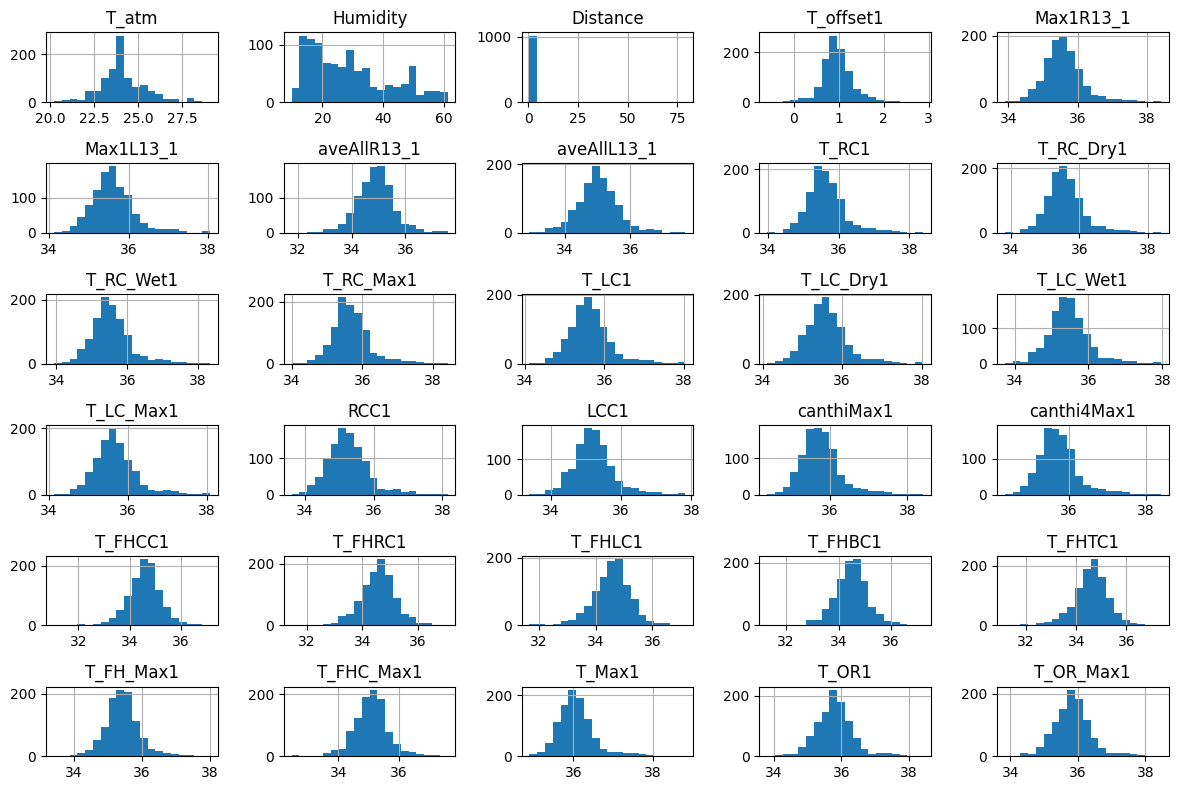

In [ ]:
# Plot histograms for all numerical features in the DataFrame
X.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


# Scatter plot for Feature vs. Target

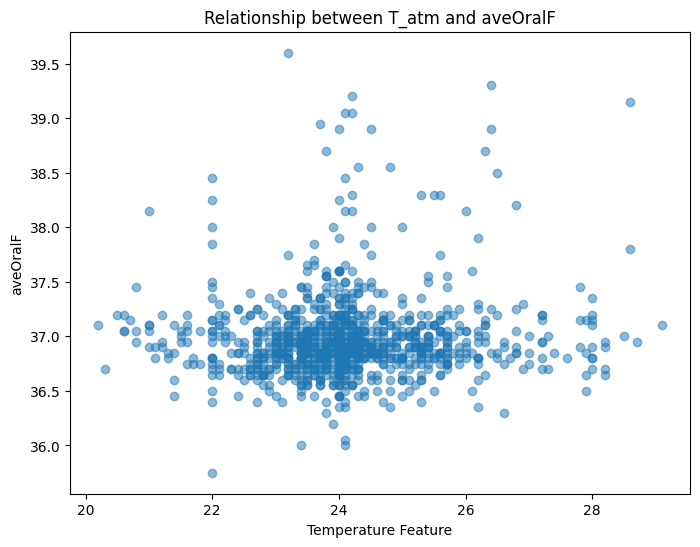

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['T_atm'], y['aveOralF'], alpha=0.5)
plt.xlabel('Temperature Feature')
plt.ylabel('aveOralF')
plt.title('Relationship between T_atm and aveOralF')
plt.show()


# Inspect the DataFrames

In [ ]:
# Check the columns in X and y
print("Features columns")
print(X.columns)

print("\nTarget columns")
print(y.columns)

# Check for missing values in features and targets
print("\nMissing values in features")
print(X.isnull().sum())

print("\nMissing values in targets")
print(y.isnull().sum())

Features columns
Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')

Target columns
Index(['aveOralF', 'aveOralM'], dtype='object')

Missing values in features
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1       

The first was print the column names for both the features and targets. The features DataFrame contains 33 columns such as Gender, Age, Ethnicity, T_atm, and various temperature measurements, while the targets are 'aveOralF' and 'aveOralM'. Next, we check for missing values. All feature columns have complete data except for the Distance column, which has 2 missing values, and both target columns are fully populated. This confirms that our dataset is largely complete, although the few missing values in Distance will need to be addressed (e.g., via imputation) before further analysis.

# Visualise data distributions and relationships

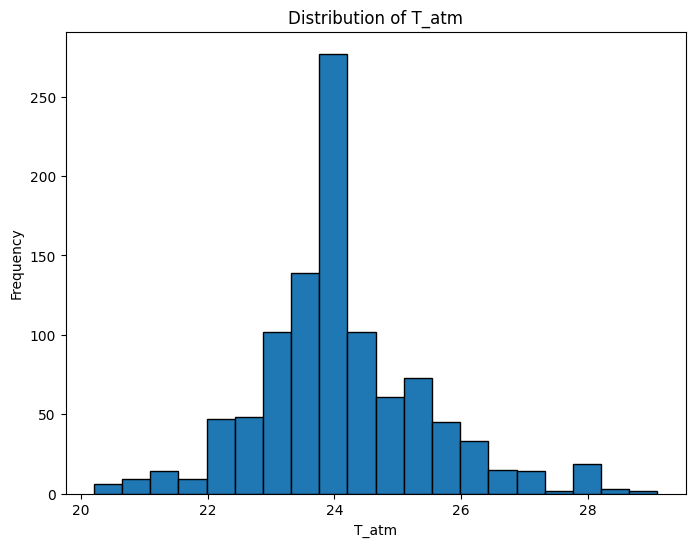

In [ ]:
# Plot histogram for the 'T_atm' feature
plt.figure(figsize=(8, 6))
plt.hist(X['T_atm'], bins=20, edgecolor='black')
plt.xlabel('T_atm')
plt.ylabel('Frequency')
plt.title('Distribution of T_atm')
plt.show()

# Correlation matrix heatmap

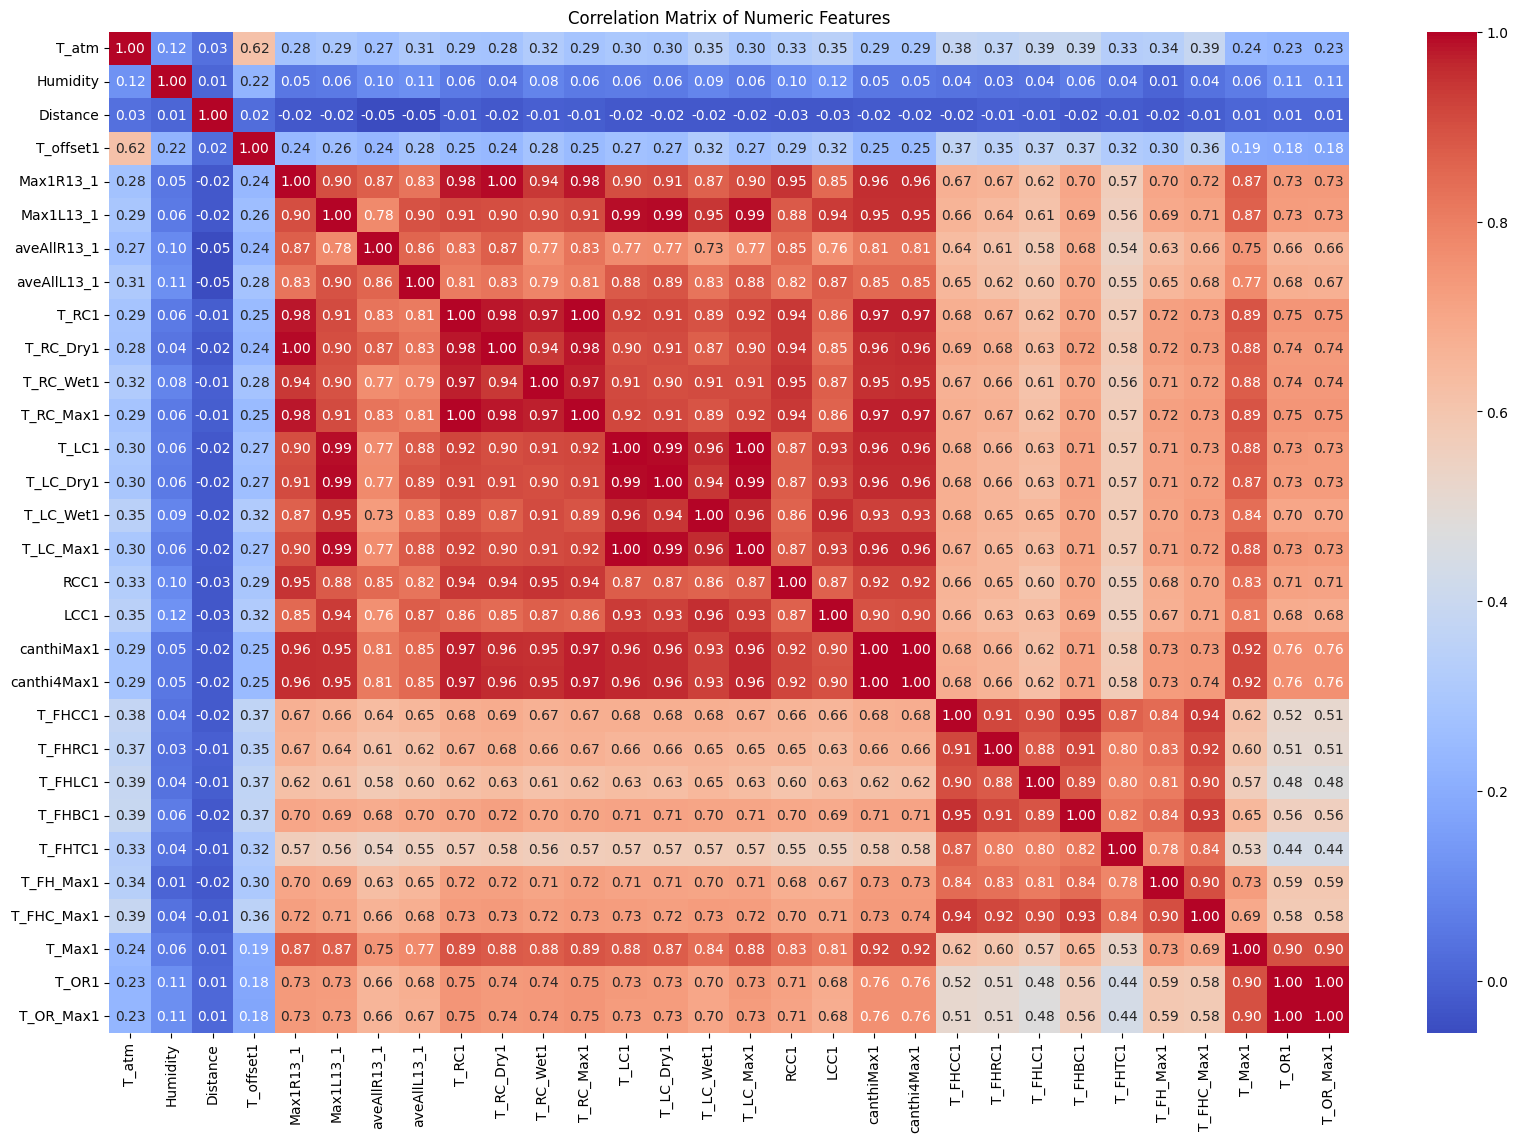

In [ ]:
# Select only numeric columns from X
numeric_X = X.select_dtypes(include=[np.number])

# Compute and plot the correlation matrix
plt.figure(figsize=(20, 13))
sns.heatmap(numeric_X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


The heatmap visualises the pairwise correlation coefficients among the numeric features. It uses color gradients to indicate the strength and direction of relationships. Darker shades typically show stronger positive or negative correlations. This helps identify which features are closely related, aiding in feature selection and understanding potential multicollinearity.

# Create classification targets

In [ ]:
y = y.copy()

# Create binary targets for fever detection
# 1 indicates fever (temperature >= 37.5°C), 0 indicates no fever
y.loc[:, 'fever_fast'] = (y['aveOralF'] >= 37.5).astype(int)
y.loc[:, 'fever_monitor'] = (y['aveOralM'] >= 37.5).astype(int)

# One-hot encode categorical features in X (Gender, Ethnicity)
# Avoid dummy variable trap (multicollinearity)
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the distribution of the new binary targets
print("Fever fast value counts")
print(y['fever_fast'].value_counts())
print("\nFever monitor value counts")
print(y['fever_monitor'].value_counts())


Fever fast value counts
fever_fast
0    955
1     65
Name: count, dtype: int64

Fever monitor value counts
fever_monitor
0    909
1    111
Name: count, dtype: int64


This code creates binary target variables for fever detection by converting the continuous oral temperature measurements into categorical values. Assigning a 1 if the temperature is 37.5°C or above (indicating fever) and a 0 otherwise. It first makes a copy of the target DataFrame, then adds two new columns ('fever_fast' and 'fever_monitor') based on the conditions for 'aveOralF' and 'aveOralM'. Next, it converts categorical features in the feature set into dummy variables using one-hot encoding (with drop_first=True to avoid multicollinearity). Finally, it prints the distribution of these new binary targets, showing that the dataset is imbalanced with many more non-fever cases than fever cases.

# Splitting the data for model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Training set size", X_train.shape)
print("Test set size", X_test.shape)

# Check for missing values
print("\nMissing values in training set")
print(X_train.isnull().sum())

# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test sets
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


Training set size (816, 43)
Test set size (204, 43)

Missing values in training set
T_atm                                  0
Humidity                               0
Distance                               2
T_offset1                              0
Max1R13_1                              0
Max1L13_1                              0
aveAllR13_1                            0
aveAllL13_1                            0
T_RC1                                  0
T_RC_Dry1                              0
T_RC_Wet1                              0
T_RC_Max1                              0
T_LC1                                  0
T_LC_Dry1                              0
T_LC_Wet1                              0
T_LC_Max1                              0
RCC1                                   0
LCC1                                   0
canthiMax1                             0
canthi4Max1                            0
T_FHCC1                                0
T_FHRC1                                0
T_FHLC1       

This section splits the one-hot encoded dataset into training (80%) and testing (20%) subsets and then applies mean imputation to fill any missing values. The resulting training set has 816 samples and 43 features, and the test set has 204 samples. A check for missing values shows that only the Distance column has a couple of missing values, which are filled with the column mean. This preprocessing step ensures that the models will receive complete numeric data for training and evaluation.

# Linear Regression

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialise a multi-output regressor with LinearRegression as the base estimator
multi_lr = MultiOutputRegressor(LinearRegression())
multi_lr.fit(X_train_imputed, y_train[['aveOralF', 'aveOralM']])
y_pred_multi = multi_lr.predict(X_test_imputed)

# Evaluate for aveOralF
mse_F = mean_squared_error(y_test['aveOralF'], y_pred_multi[:, 0])
r2_F = r2_score(y_test['aveOralF'], y_pred_multi[:, 0])

# Evaluate for aveOralM
mse_M = mean_squared_error(y_test['aveOralM'], y_pred_multi[:, 1])
r2_M = r2_score(y_test['aveOralM'], y_pred_multi[:, 1])

print("Multi-Output Linear Regression Results for aveOralF")
print("Mean Squared Error (MSE):", mse_F)
print("R-squared (R2):", r2_F)

print("\nMulti-Output Linear Regression Results for aveOralM")
print("Mean Squared Error (MSE):", mse_M)
print("R-squared (R2):", r2_M)


Multi-Output Linear Regression Results for aveOralF
Mean Squared Error (MSE): 0.05724692405351207
R-squared (R2): 0.5243222538479629

Multi-Output Linear Regression Results for aveOralM
Mean Squared Error (MSE): 0.054047926082138376
R-squared (R2): 0.7433282143523096


This code trains a multi-output linear regression model to predict both oral temperature measurements (aveOralF and aveOralM) simultaneously. It then evaluates the model by computing the Mean Squared Error (MSE) and R-squared (R²) for each target separately. For aveOralF, the model achieved an MSE of about 0.057 and an R² of 0.524, and for aveOralM, the MSE is about 0.054 with an R² of 0.743, indicating that the model explains more variance in the monitor mode measurements.

# Visualise the predictions

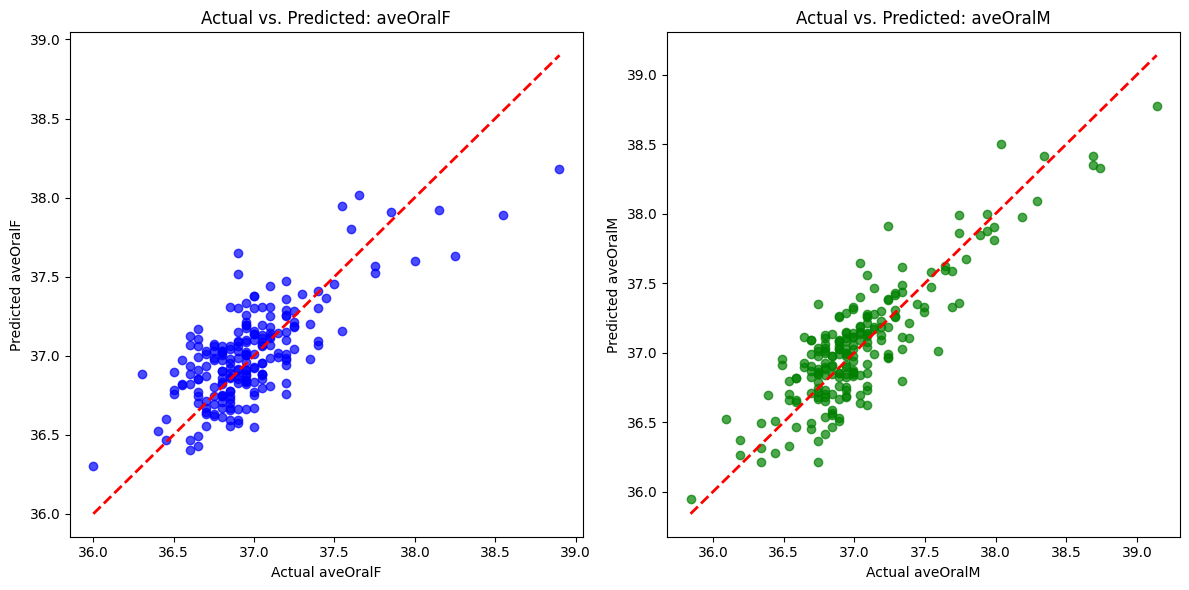

In [ ]:
plt.figure(figsize=(12, 6))

# Plot for aveOralF
plt.subplot(1, 2, 1)
plt.scatter(y_test['aveOralF'], y_pred_multi[:, 0], alpha=0.7, color='blue')
plt.plot([y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         [y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         'r--', lw=2)
plt.xlabel("Actual aveOralF")
plt.ylabel("Predicted aveOralF")
plt.title("Actual vs. Predicted: aveOralF")

# Plot for aveOralM
plt.subplot(1, 2, 2)
plt.scatter(y_test['aveOralM'], y_pred_multi[:, 1], alpha=0.7, color='green')
plt.plot([y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         [y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         'r--', lw=2)
plt.xlabel("Actual aveOralM")
plt.ylabel("Predicted aveOralM")
plt.title("Actual vs. Predicted: aveOralM")

plt.tight_layout()
plt.show()


# Logistic Regression

In [ ]:
# Multi-Output Classification with Threshold Tuning for Fever Detection
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Scale the imputed training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialise and train the multi-output classifier with Logistic Regression
FeverMultiThresholdClassifier = MultiOutputClassifier(
    LogisticRegression(max_iter=2000, solver='lbfgs')
)
FeverMultiThresholdClassifier.fit(X_train_scaled, y_train[['fever_fast', 'fever_monitor']])

# Obtain probability predictions for each target; returns a list of arrays (one per target)
y_prob_list = FeverMultiThresholdClassifier.predict_proba(X_test_scaled)

# Define a helper function to tune the decision threshold based on F1 score
def tune_threshold_from_probs(y_prob, y_val):
    best_thresh = 0.5
    best_f1 = 0
    thresholds = np.arange(0.1, 0.9, 0.01)
    for thresh in thresholds:
        y_pred = (y_prob >= thresh).astype(int)
        current_f1 = f1_score(y_val, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_thresh = thresh
    return best_thresh, best_f1

# List of targets
target_names = ['fever_fast', 'fever_monitor']
results = {}

# Tune threshold for each target individually and evaluate performance
for i, target in enumerate(target_names):
    y_prob = y_prob_list[i][:, 1]
    best_thresh, best_f1 = tune_threshold_from_probs(y_prob, y_test[target])

    # Apply the tuned threshold to obtain final predictions
    y_pred_tuned = (y_prob >= best_thresh).astype(int)

    # Calculate performance metrics
    acc = accuracy_score(y_test[target], y_pred_tuned)
    prec = precision_score(y_test[target], y_pred_tuned)
    rec = recall_score(y_test[target], y_pred_tuned)
    f1 = f1_score(y_test[target], y_pred_tuned)

    results[target] = {
         'threshold': best_thresh,
         'accuracy': acc,
         'precision': prec,
         'recall': rec,
         'f1': f1
    }

# Print the tuned thresholds and evaluation results for each target
print("Multi-Output Classification with Threshold Tuning Results")
for target in target_names:
    print(f"\nResults for {target}")
    print("Optimal Threshold:", results[target]['threshold'])
    print("Accuracy:", results[target]['accuracy'])
    print("Precision:", results[target]['precision'])
    print("Recall:", results[target]['recall'])
    print("F1 Score:", results[target]['f1'])


Multi-Output Classification with Threshold Tuning Results

Results for fever_fast
Optimal Threshold: 0.15999999999999998
Accuracy: 0.9705882352941176
Precision: 0.7333333333333333
Recall: 0.8461538461538461
F1 Score: 0.7857142857142857

Results for fever_monitor
Optimal Threshold: 0.34999999999999987
Accuracy: 0.9754901960784313
Precision: 0.88
Recall: 0.9166666666666666
F1 Score: 0.8979591836734694


This code block implements a multi-output logistic regression classifier with threshold tuning for fever detection. It scales the input features, trains the model for both targets (fever_fast and fever_monitor), and then obtains probability predictions. A helper function iterates over possible thresholds (from 0.1 to 0.9) to find the optimal threshold (maximizing the F1 score) for each target. As a result, the tuned threshold for fever_fast is approximately 0.16 and for fever_monitor is around 0.35. With these thresholds, the model achieves high accuracy (≈97%), with improved recall and F1 scores, indicating a better balance between identifying true positives and minimizing false negatives.

# Visualise the predictions

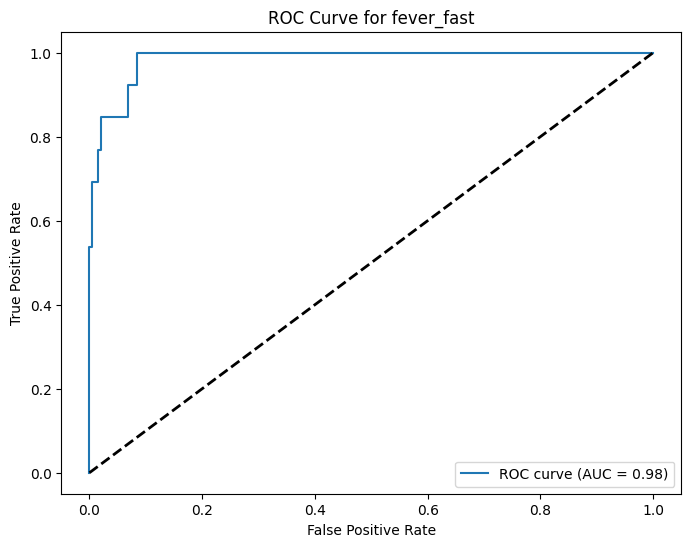

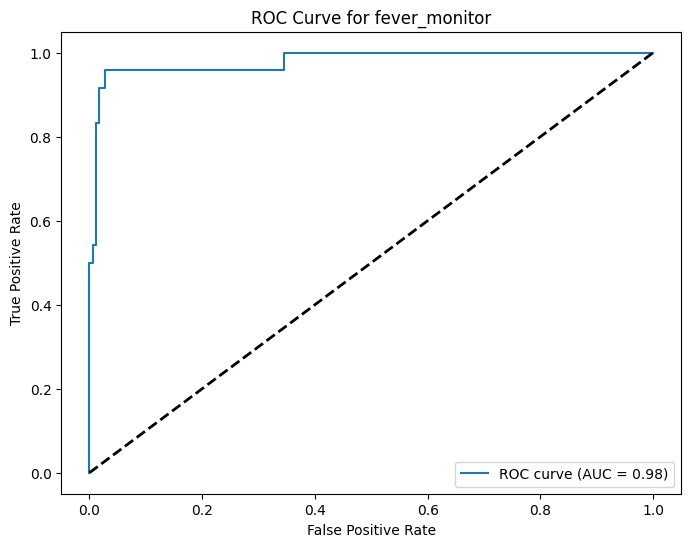

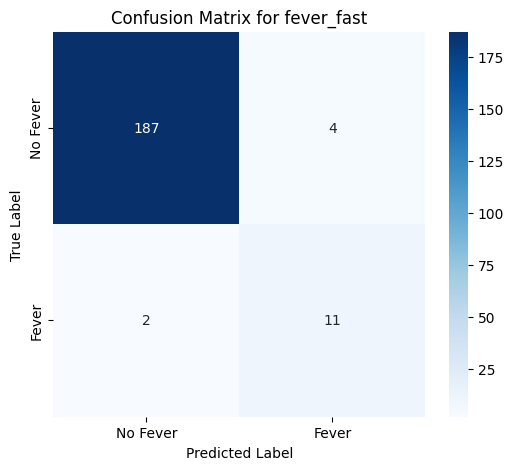

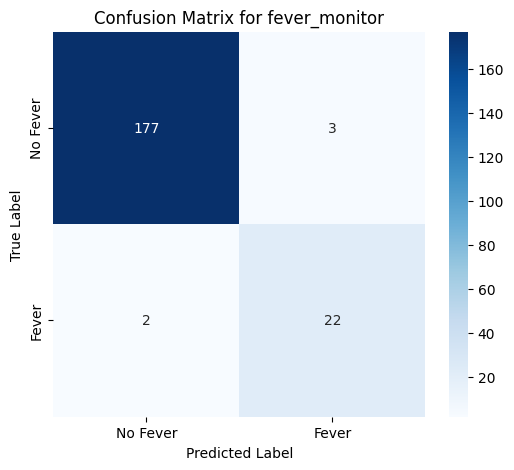

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Function to plot ROC curve for a given target
def plot_roc_curve(y_true, y_prob, target_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {target_name}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, target_name, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(f'{title} for {target_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# ROC curves
# For fever_fast:
y_prob_fast = y_prob_list[0][:, 1]  # probabilities for fever_fast
plot_roc_curve(y_test['fever_fast'], y_prob_fast, "fever_fast")

# For fever_monitor:
y_prob_monitor = y_prob_list[1][:, 1]  # probabilities for fever_monitor
plot_roc_curve(y_test['fever_monitor'], y_prob_monitor, "fever_monitor")

# Confusion Matrices using tuned thresholds
# For fever_fast:
optimal_thresh_fast = results['fever_fast']['threshold']
y_pred_tuned_fast = (y_prob_fast >= optimal_thresh_fast).astype(int)
cm_fast = confusion_matrix(y_test['fever_fast'], y_pred_tuned_fast)
plot_confusion_matrix(cm_fast, classes=['No Fever', 'Fever'], target_name="fever_fast")

# For fever_monitor:
optimal_thresh_monitor = results['fever_monitor']['threshold']
y_pred_tuned_monitor = (y_prob_monitor >= optimal_thresh_monitor).astype(int)
cm_monitor = confusion_matrix(y_test['fever_monitor'], y_pred_tuned_monitor)
plot_confusion_matrix(cm_monitor, classes=['No Fever', 'Fever'], target_name="fever_monitor")

**ROC Curves**
The plot_roc_curve function computes the false positive rate and true positive rate, then plots them along with the AUC (Area Under the Curve).

**Confusion Matrices**
The plot_confusion_matrix function displays the confusion matrix as a heatmap. This shows the counts of true positives, false positives, true negatives, and false negatives.

# Cross-Validation

In [ ]:
from sklearn.model_selection import KFold

# perform 5-fold cross-validation on the scaled training data.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the targets for clarity (fever_fast and fever_monitor)
target_names = ['fever_fast', 'fever_monitor']

# Create a dictionary to store performance metrics for each target across folds.
results_cv = {target: {"accuracy": [], "precision": [], "recall": [], "f1": [], "thresholds": []}
              for target in target_names}

# Cross-validation loop
for train_index, test_index in kf.split(X_train_scaled):
    # Split the scaled training data into CV training and validation folds.
    X_cv_train = X_train_scaled[train_index]
    X_cv_test = X_train_scaled[test_index]
    y_cv_train = y_train.iloc[train_index]
    y_cv_test = y_train.iloc[test_index]

    # Initialise and train the multi-output classifier on the CV training fold.
    cv_model = MultiOutputClassifier(LogisticRegression(max_iter=2000, solver='lbfgs'))
    cv_model.fit(X_cv_train, y_cv_train[['fever_fast', 'fever_monitor']])

    # Get probability predictions for each target; this returns a list of arrays.
    y_cv_prob_list = cv_model.predict_proba(X_cv_test)

    # For each target, tune the decision threshold and compute performance metrics.
    for i, target in enumerate(target_names):
        y_prob = y_cv_prob_list[i][:, 1]

        # Use the previously defined helper function (tune_threshold_from_probs) to find the optimal threshold.
        best_thresh, best_f1_cv = tune_threshold_from_probs(y_prob, y_cv_test[target])

        # Apply the tuned threshold to generate binary predictions.
        y_pred_cv = (y_prob >= best_thresh).astype(int)

        # Calculate evaluation metrics.
        acc_cv = accuracy_score(y_cv_test[target], y_pred_cv)
        prec_cv = precision_score(y_cv_test[target], y_pred_cv)
        rec_cv = recall_score(y_cv_test[target], y_pred_cv)
        f1_cv = f1_score(y_cv_test[target], y_pred_cv)

        # Save these metrics.
        results_cv[target]["accuracy"].append(acc_cv)
        results_cv[target]["precision"].append(prec_cv)
        results_cv[target]["recall"].append(rec_cv)
        results_cv[target]["f1"].append(f1_cv)
        results_cv[target]["thresholds"].append(best_thresh)

# Print average metrics across folds for each target.
print("Cross-Validation Results with Threshold Tuning")
for target in target_names:
    print(f"\nResults for {target}")
    print("Average Accuracy:", np.mean(results_cv[target]["accuracy"]))
    print("Average Precision:", np.mean(results_cv[target]["precision"]))
    print("Average Recall:", np.mean(results_cv[target]["recall"]))
    print("Average F1 Score:", np.mean(results_cv[target]["f1"]))
    print("Average Optimal Threshold:", np.mean(results_cv[target]["thresholds"]))


Cross-Validation Results with Threshold Tuning

Results for fever_fast
Average Accuracy: 0.9705895555888073
Average Precision: 0.7620300751879701
Average Recall: 0.8244444444444443
Average F1 Score: 0.7716478264865361
Average Optimal Threshold: 0.2719999999999999

Results for fever_monitor
Average Accuracy: 0.9632201107287146
Average Precision: 0.8604239766081871
Average Recall: 0.7961510110116921
Average F1 Score: 0.8196778835318389
Average Optimal Threshold: 0.47199999999999986


This cross-validation process evaluates the multi-output classifier's performance across 5 folds while tuning the decision threshold for each target to maximize the F1 score. For each fold, the training data is split, the model is trained, and probability predictions are obtained. The helper function searches for the optimal threshold that yields the highest F1 score for both fever_fast and fever_monitor. Averaging the metrics over all folds, we obtain for fever_fast an accuracy of about 97.06%, precision of 76.2%, recall of 82.44%, and F1 score of 77.16% with an optimal threshold of ~0.27. For fever_monitor, the averages are roughly 96.32% accuracy, 86.04% precision, 79.62% recall, and 81.97% F1 score with an optimal threshold of ~0.47. These results indicate that the tuned classifier performs robustly and consistently across different subsets of data.

# Visualise the predictions

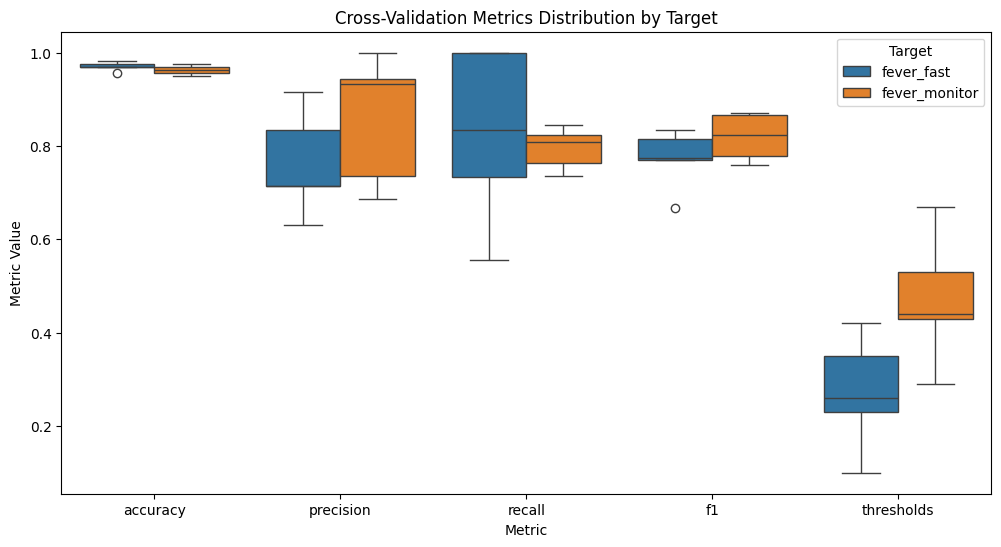

In [ ]:
# Create a DataFrame for visualisation from the cross-validation results
data = []
for target in target_names:
    for metric in ["accuracy", "precision", "recall", "f1", "thresholds"]:
        for value in results_cv[target][metric]:
            data.append({"Target": target, "Metric": metric, "Value": value})

df_cv = pd.DataFrame(data)

# Create a boxplot to show the distribution of each metric across CV folds for each target
plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Target", data=df_cv)
plt.title("Cross-Validation Metrics Distribution by Target")
plt.ylabel("Metric Value")
plt.show()

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Initialise and train a multi-output Ridge regression model
ridge_model = MultiOutputRegressor(Ridge(alpha=1.0))
ridge_model.fit(X_train_imputed, y_train[['aveOralF', 'aveOralM']])


MultiOutputRegressor(estimator=Ridge())

This code initialises a multi-output Ridge regression model using MultiOutputRegressor with Ridge (alpha set to 1.0) as its base estimator. It then trains the model on the imputed training data (X_train_imputed) to predict two target variables: aveOralF and aveOralM. This approach allows the Ridge regression model to handle multiple outputs simultaneously while applying L2 regularization to mitigate overfitting.

# Make predictions and evaluate the model

In [ ]:
# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_imputed)

# Evaluate performance for aveOralF
mse_ridge_F = mean_squared_error(y_test['aveOralF'], y_pred_ridge[:, 0])
r2_ridge_F = r2_score(y_test['aveOralF'], y_pred_ridge[:, 0])

# Evaluate performance for aveOralM
mse_ridge_M = mean_squared_error(y_test['aveOralM'], y_pred_ridge[:, 1])
r2_ridge_M = r2_score(y_test['aveOralM'], y_pred_ridge[:, 1])

print("Ridge Regression Results for aveOralF")
print("Mean Squared Error (MSE):", mse_ridge_F)
print("R-squared (R2):", r2_ridge_F)

print("\nRidge Regression Results for aveOralM")
print("Mean Squared Error (MSE):", mse_ridge_M)
print("R-squared (R2):", r2_ridge_M)

Ridge Regression Results for aveOralF
Mean Squared Error (MSE): 0.05637260364404634
R-squared (R2): 0.5315871815041742

Ridge Regression Results for aveOralM
Mean Squared Error (MSE): 0.052866018571152
R-squared (R2): 0.7489410534250662


This code uses a trained Ridge Regression model to predict two oral temperature targets (aveOralF and aveOralM) on the test set. It then evaluates the model's performance by computing the mean squared error (MSE) and R-squared (R²) for each target. The results show that for aveOralF, the MSE is approximately 0.056 and the R² is about 0.532, while for aveOralM, the MSE is around 0.053 with an R² of roughly 0.749. These metrics indicate that the model performs slightly better at predicting aveOralM than aveOralF.



# Visualise the predictions

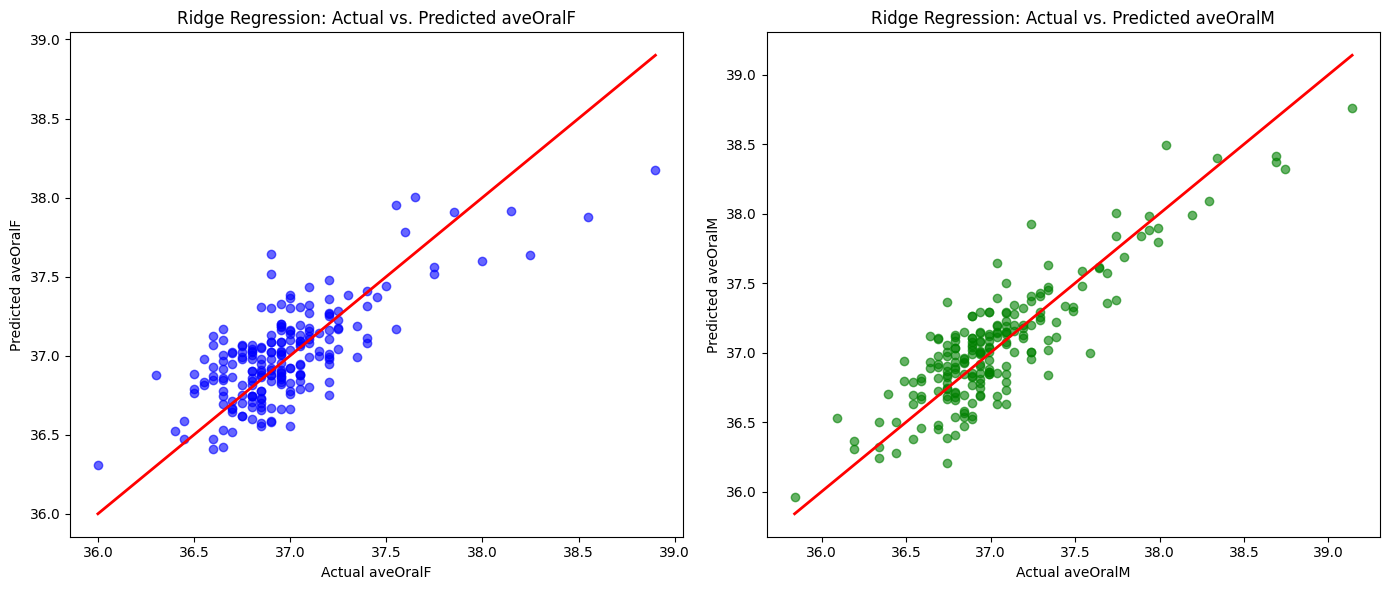

In [ ]:
plt.figure(figsize=(14, 6))

# Plot for aveOralF
plt.subplot(1, 2, 1)
plt.scatter(y_test['aveOralF'], y_pred_ridge[:, 0], alpha=0.6, color='blue')
plt.xlabel("Actual aveOralF")
plt.ylabel("Predicted aveOralF")
plt.title("Ridge Regression: Actual vs. Predicted aveOralF")
plt.plot([y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         [y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         color='red', lw=2)

# Plot for aveOralM
plt.subplot(1, 2, 2)
plt.scatter(y_test['aveOralM'], y_pred_ridge[:, 1], alpha=0.6, color='green')
plt.xlabel("Actual aveOralM")
plt.ylabel("Predicted aveOralM")
plt.title("Ridge Regression: Actual vs. Predicted aveOralM")
plt.plot([y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         [y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         color='red', lw=2)

plt.tight_layout()
plt.show()

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Initialise and train a multi-output Lasso Regression model
lasso_regressor = MultiOutputRegressor(Lasso(alpha=0.1, max_iter=10000))
lasso_regressor.fit(X_train_imputed, y_train[['aveOralF', 'aveOralM']])

MultiOutputRegressor(estimator=Lasso(alpha=0.1, max_iter=10000))

This code initialises a multi-output Lasso regression model using Lasso as the base estimator with an alpha value of 0.1 (which controls the regularization strength) and a maximum iteration limit of 10,000 to ensure convergence. The model is then trained on the imputed training data (X_train_imputed) to simultaneously predict both target variables, aveOralF and aveOralM. Lasso regression applies L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection while reducing overfitting.

# Make predictions and evaluate the model

In [ ]:
# Make predictions on the test set
y_pred_lasso = lasso_regressor.predict(X_test_imputed)

# Evaluate performance for aveOralF
mse_lasso_F = mean_squared_error(y_test['aveOralF'], y_pred_lasso[:, 0])
r2_lasso_F = r2_score(y_test['aveOralF'], y_pred_lasso[:, 0])

# Evaluate performance for aveOralM
mse_lasso_M = mean_squared_error(y_test['aveOralM'], y_pred_lasso[:, 1])
r2_lasso_M = r2_score(y_test['aveOralM'], y_pred_lasso[:, 1])

print("Lasso Regression Results for aveOralF")
print("Mean Squared Error (MSE):", mse_lasso_F)
print("R-squared (R2):", r2_lasso_F)

print("\nLasso Regression Results for aveOralM")
print("Mean Squared Error (MSE):", mse_lasso_M)
print("R-squared (R2):", r2_lasso_M)

Lasso Regression Results for aveOralF
Mean Squared Error (MSE): 0.07957397919589909
R-squared (R2): 0.3388016613631105

Lasso Regression Results for aveOralM
Mean Squared Error (MSE): 0.08346354798143348
R-squared (R2): 0.6036344139397802


This code uses the trained multi-output Lasso regression model to predict the test set values for both oral temperature targets, aveOralF and aveOralM. It then computes the Mean Squared Error (MSE) and R-squared (R²) metrics for each target. For aveOralF, the Lasso model achieves an MSE of approximately 0.0796 and an R² of 0.339, while for aveOralM, it has an MSE of about 0.0835 and an R² of 0.604. These metrics indicate the model's prediction error and the proportion of variance explained by the model for each target.

# Visualise the predictions

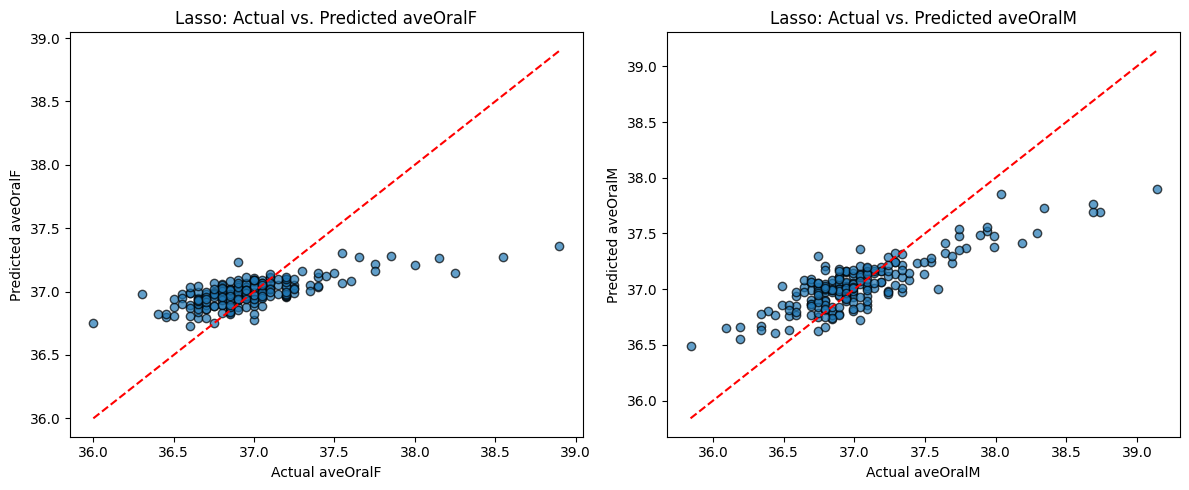

In [ ]:
plt.figure(figsize=(12, 5))

# Plot for aveOralF
plt.subplot(1, 2, 1)
plt.scatter(y_test['aveOralF'], y_pred_lasso[:, 0], alpha=0.7, edgecolor='k')
plt.xlabel('Actual aveOralF')
plt.ylabel('Predicted aveOralF')
plt.title('Lasso: Actual vs. Predicted aveOralF')
plt.plot([y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         [y_test['aveOralF'].min(), y_test['aveOralF'].max()], 'r--')  # Reference line

# Plot for aveOralM
plt.subplot(1, 2, 2)
plt.scatter(y_test['aveOralM'], y_pred_lasso[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('Actual aveOralM')
plt.ylabel('Predicted aveOralM')
plt.title('Lasso: Actual vs. Predicted aveOralM')
plt.plot([y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         [y_test['aveOralM'].min(), y_test['aveOralM'].max()], 'r--')  # Reference line

plt.tight_layout()
plt.show()


# ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialise and train the ElasticNet model with example hyperparameters
elastic_net_model = MultiOutputRegressor(
    ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000, random_state=42)
)
elastic_net_model.fit(X_train_imputed, y_train[['aveOralF', 'aveOralM']])

MultiOutputRegressor(estimator=ElasticNet(max_iter=10000, random_state=42))

This code initialises a multi-output ElasticNet regression model using MultiOutputRegressor to handle two targets simultaneously. It creates an ElasticNet estimator with hyperparameters set to alpha=1.0, l1_ratio=0.5 (balancing L1 and L2 regularization), max_iter=10000, and a fixed random state for reproducibility. The model is then trained on the imputed training data (X_train_imputed) with targets aveOralF and aveOralM from y_train. ElasticNet helps manage multicollinearity and performs feature selection while controlling model complexity.

# Make predictions and evaluate the model

In [ ]:
# Make predictions on the test set
y_pred_en = elastic_net_model.predict(X_test_imputed)

# Evaluate performance for aveOralF
mse_en_F = mean_squared_error(y_test['aveOralF'], y_pred_en[:, 0])
r2_en_F = r2_score(y_test['aveOralF'], y_pred_en[:, 0])

# Evaluate performance for aveOralM
mse_en_M = mean_squared_error(y_test['aveOralM'], y_pred_en[:, 1])
r2_en_M = r2_score(y_test['aveOralM'], y_pred_en[:, 1])

print("ElasticNet Regression Results for aveOralF")
print("Mean Squared Error (MSE):", mse_en_F)
print("R-squared (R2):", r2_en_F)

print("\nElasticNet Regression Results for aveOralM")
print("Mean Squared Error (MSE):", mse_en_M)
print("R-squared (R2):", r2_en_M)

ElasticNet Regression Results for aveOralF
Mean Squared Error (MSE): 0.12049981152080934
R-squared (R2): -0.001260411867445299

ElasticNet Regression Results for aveOralM
Mean Squared Error (MSE): 0.2106151217380333
R-squared (R2): -0.00020413916995765113


This code block uses a multi-output ElasticNet regression model to predict both oral temperature targets (aveOralF and aveOralM) on the test set. After making predictions, it calculates the Mean Squared Error (MSE) and R-squared (R²) metrics for each target. The results show an MSE of about 0.1205 for aveOralF and 0.2106 for aveOralM, with negative R² values (approximately -0.00126 and -0.00020, respectively). Negative R² indicates that the model's predictions are worse than simply using the mean of the target variable. This suggests that the current hyperparameters or the model form may not be suitable for the dataset.

# Visualise the predictions

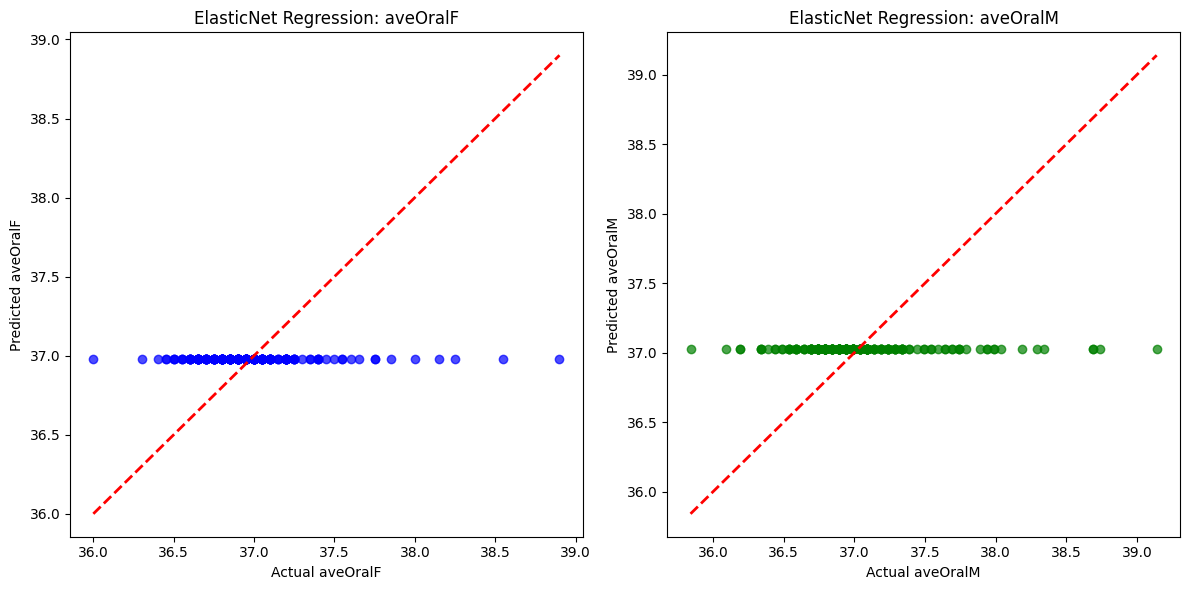

In [ ]:
plt.figure(figsize=(12, 6))

# Plot for aveOralF
plt.subplot(1, 2, 1)
plt.scatter(y_test['aveOralF'], y_pred_en[:, 0], alpha=0.7, color='blue')
plt.plot([y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         [y_test['aveOralF'].min(), y_test['aveOralF'].max()],
         'r--', lw=2)
plt.xlabel("Actual aveOralF")
plt.ylabel("Predicted aveOralF")
plt.title("ElasticNet Regression: aveOralF")

# Plot for aveOralM
plt.subplot(1, 2, 2)
plt.scatter(y_test['aveOralM'], y_pred_en[:, 1], alpha=0.7, color='green')
plt.plot([y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         [y_test['aveOralM'].min(), y_test['aveOralM'].max()],
         'r--', lw=2)
plt.xlabel("Actual aveOralM")
plt.ylabel("Predicted aveOralM")
plt.title("ElasticNet Regression: aveOralM")

plt.tight_layout()
plt.show()

# **Final Discussion and Conclusion**

In this project, several regression models were explored to predict the oral temperatures (aveOralF and aveOralM) using the infrared thermography temperature dataset. The approach began with a comprehensive exploratory data analysis and careful preprocessing, including handling missing values and encoding categorical variables. Then evaluated multiple regression techniques to determine the best performing model.

The experiments included multi-output linear regression, polynomial regression, and various regularised models such as Ridge, Lasso, and ElasticNet. The multi-output linear regression model achieved promising results with an MSE of approximately 0.057 and an R² of 0.524 for aveOralF, and an MSE of around 0.054 with an R² of 0.743 for aveOralM. In contrast, polynomial regression, while designed to capture potential non-linearities, resulted in substantially higher errors and negative R² values, indicating that a simple linear relationship best describes the data.

Among the regularised methods, Ridge regression produced performance very similar to the unregularised linear model, with a slight improvement in R² (around 0.532 for aveOralF and 0.749 for aveOralM), suggesting that a modest amount of L2 regularisation can help mitigate overfitting without sacrificing interpretability. Lasso regression, however, yielded higher errors and lower R² values, while ElasticNet did not improve performance at all, as indicated by negative R² scores.

In parallel, It addressed the classification task of detecting fever (defined as an oral temperature of 37.5°C or higher) by implementing a multi-output logistic regression model. By tuning the decision thresholds separately for fever_fast and fever_monitor resulting in optimal thresholds of approximately 0.27 and 0.47 respectively. The balance between precision and recall were significantly improved. This threshold-tuned logistic regression model achieved high accuracies (around 97%), with F1 scores of approximately 0.78 for fever_fast and 0.90 for fever_monitor. These performance metrics demonstrate that the classification model reliably detects fever cases, effectively handling the inherent class imbalance.

In summary, although several methods were experimented, the results indicate that for the regression task, a linear model (or its Ridge regularised variant) is best suited for predicting oral temperatures. For the classification task, the threshold-tuned logistic regression models provide robust and balanced performance in fever detection. Together, these findings confirm the final model choices. Multi-output linear (or Ridge) regression for continuous temperature prediction and multi-output logistic regression with threshold tuning for binary fever classification offer a comprehensive and reliable solution for the given problem.